In [1]:
#Put introductory header here
#note, a lot of this logic was written with the aid of chatgpt to get this written in a short amount of time
#the mapping section may also go into a python script and not in the jupyter notebook

In [2]:
#package imports

#standard os and sys (probably won't be used, but just in case)
import os,sys

#pandas, to handle the csv/json data
import pandas as pd

#matplotlib.pyplot to handle most plotting
import matplotlib.pyplot as plt

#seabons as potential plotting alternative, may scrap later if I don't use it
import seaborn as sns

#numpy for NaN sanitization
import numpy as np

In [3]:
#read in the import file

#place your data file here within the double quotes
#it should either be a json or csv file, directly from the download for the nomination stats tool
#modifications could render the file useless here...
#default example points towards "data_files/nominations_AG_8_29_25.csv"

#UNLESS YOU KNOW WHAT YOU ARE DOING, THIS IS THE ONLY PIECE OF CODE THAT YOU SHOULD EDIT!!!
my_stats_file = "data_files/nominations_AG_12_17_25.csv"


In [4]:
#move the stats file into a pandas dataframe so that we can process and graph data
#determine if the file is a csv or json file (or other, in which case, reject)

if my_stats_file.endswith(".csv"):
    df = pd.read_csv(my_stats_file)
elif my_stats_file.endswith(".json"):
    df = pd.read_json(my_stats_file)
else:
    print("WARNING! " + my_stats_file + " is not a cav or json file! The rest of the notebook will not work!")
    
#derive the location of the input file, so we can use it to write image files to the path, named after the input file
input_dir = os.path.dirname(os.path.abspath(my_stats_file))

#derive the file name to get a prefix
file_prefix = my_stats_file.split("/")[len(my_stats_file.split("/")) - 1].split(".")[0]

#create a new folder where generated image files will be written to
os.system("mkdir " + input_dir + "/" + file_prefix)

#adjust input_dir to include the file_prefix for an output location
input_dir = input_dir + "/" + file_prefix

#tweak prefix to have tailing underscore
file_prefix = file_prefix + "_"

print("We will be printing image files with the prefix: " + file_prefix)
print("Files will be written to the path: " + input_dir)

We will be printing image files with the prefix: nominations_AG_12_17_25_
Files will be written to the path: /home/ari.ginsparg-umw/niantic_wayfarer_nominations_analysis/data_files/nominations_AG_12_17_25


In [5]:
#sanitizing

#standardize city and state columns so that all strings are converted to upper case for downstream aggregation
df["city"] = df["city"].str.upper()
df["state"] = df["state"].str.upper()

#filter down only on nominations (no edits, photos, etc)
df = df[df["type"] == "NOMINATION"]

#only select accepted, duplicate, rejected, and withdrawn nominations (all of these are terminal statuses)
df = df[df["status"].isin(["ACCEPTED", "DUPLICATE", "REJECTED", "WITHDRAWN"])]

#declare coloring and ordering schema
plot_order = ["ACCEPTED", "DUPLICATE", "REJECTED", "WITHDRAWN"]
colors = ["green", "orange", "red", "purple"]

#convery empty or NaN fields for city and state to "UNREGISTERED"
#will also output entries with at least one unregistered value to a csv for later user review
df[["city", "state"]] = df[["city", "state"]].replace(np.nan, "UNREGISTERED")
df[["city", "state"]] = df[["city", "state"]].replace("", "UNREGISTERED")

#copy unregistered location data to a separate data frame
df_unregistered = df[(df["city"] == "UNREGISTERED") | (df["state"] == "UNREGISTERED")]

#write the unregistered dataframe to a csv file
df_unregistered.to_csv(input_dir + "/" + file_prefix + "unregistered_location_nominations.csv")

In [6]:
#condensed test output of the data frame contents
df

,id,type,title,description,lat,lng,city,state,day,order,...,poiData_130,poiData_131,poiData_132,poiData_133,poiData_134,poiData_135,poiData_136,poiData_137,poiData_138,poiData_139
2,UQUOD1RQDwVXVANcBAFQVgBRAFYKClVQAAdXU1FSUANLVW...,NOMINATION,Residential Commons and University Commons Vol...,This volleyball court is a provided facility f...,37.956219,-91.778386,ROLLA,MO,2018-03-03,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UQUOD1RQDwVXVANcBAFQVgBRAFYKClVQAAdXU1FSUANLVQ...,NOMINATION,Welcome To University Commons,Sign to welcome residents to the University Co...,37.955844,-91.779268,ROLLA,MO,2018-03-04,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UQUOD1RQDwVXVANcBAFQVgBRAFYKClVQAAdXU1FSUANLVQ...,NOMINATION,Residential Commons 1,Sign denoting the Residential Commons 1 building.,37.955327,-91.777796,ROLLA,MO,2018-03-04,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,UQUOD1RQDwVXVANcBAFQVgBRAFYKClVQAAdXU1FSUANLVQ...,NOMINATION,S&T Electrical Engineering Building,North upper entrance to the electrical enginee...,37.956372,-91.772927,ROLLA,MO,2018-03-04,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,UQUOD1RQDwVXVANcBAFQVgBRAFYKClVQAAdXU1FSUANLVW...,NOMINATION,Zatar Eastern Mediterranean Cuisine,Mediterranean dining option that opened in Jan...,37.954312,-91.775975,ROLLA,MO,2018-03-04,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3468,UgZRBQ9VA1IBAANWBF4GVFkCUgIHXFBTBQNRUAwJWl1LBwcH,NOMINATION,Corner Cafe,"Corner Cafe, opened in October 2025, is a Kosh...",38.664879,-90.518668,CHESTERFIELD,MO,2025-12-10,3468.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3469,AwAAAAAFDlMLXQ1XBFxTU1oHVQVRWwEHAQ4MAQVTA1ZLBwcH,NOMINATION,Ragland Road Mural,A hand-painted fresco-style mural of a scene o...,38.673331,-90.367650,OLIVETTE,MO,2025-12-11,3469.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3475,AVMFAgYDVAgGUwRXBAoCAAEDVF5QAARSA1QHVgxSA1ZLBwcH,NOMINATION,STL Mural,This mural in the Truck Norris dining room dep...,38.603835,-90.583733,BALLWIN,MO,2025-12-12,3475.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3476,XAUDBVIABlMHVlQGBAkOBQFQU18ACAcDAAZUW1VTA1VLBwcH,NOMINATION,Truck Norris Wall Art,"Pop art in a very literal sense, this 3D mural...",38.603829,-90.583339,BALLWIN,MO,2025-12-12,3476.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


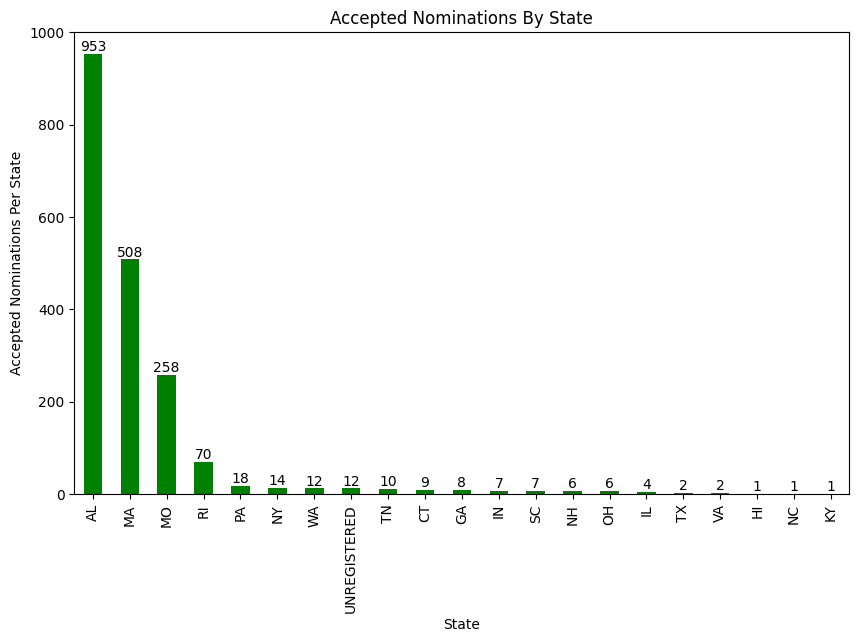

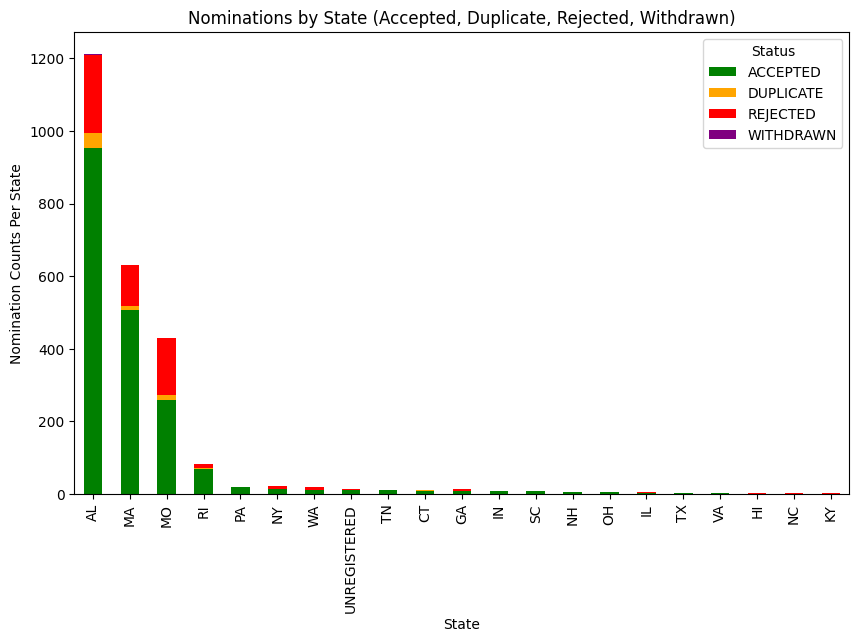

In [7]:
#Plot #1 - Nominations bar plot by state
#This will create two plots, a bar plot for approved waypoints, with a bar for each unique state
#one plot will only list approvals, and the other will be a stacked bar plot that also includes rejections

#approvals only:

#create a cross table separating state and status
state_status_counts = pd.crosstab(df["state"], df["status"])

#sort the table by accepted (instead of default sort of state by alphabetical order)
state_status_counts = state_status_counts.sort_values(by="ACCEPTED", ascending=False)

#output cross table to a csv
state_status_counts.to_csv(input_dir + "/" + file_prefix + "states_table.csv")

#create a simple bar plot with matplotlib
#create the plot, make the bars green and a wider plot
ax = state_status_counts["ACCEPTED"].plot(kind="bar", color="green", figsize=(10,6))

#set title
plt.title("Accepted Nominations By State")
#set x axis label
plt.xlabel("State")
#set y axis label
plt.ylabel("Accepted Nominations Per State")

#plot the counts per state bar
for i, v in enumerate(state_status_counts["ACCEPTED"]):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10)

#save the figure
plt.savefig(input_dir + "/" + file_prefix + "states_accepted.png", dpi=150, bbox_inches="tight")
    
#show the plot
plt.show()

#now, repeat this, making stacked plots for the 4 terminal nomination types
ax = state_status_counts[["ACCEPTED", "DUPLICATE", "REJECTED", "WITHDRAWN"]].plot(kind="bar", stacked=True, color=["green", "orange", "red", "purple"], figsize=(10,6))

#set title,x,y, and now make a legend
plt.title("Nominations by State (Accepted, Duplicate, Rejected, Withdrawn)")
plt.xlabel("State")
plt.ylabel("Nomination Counts Per State")


plt.legend(title="Status")

#save the figure
plt.savefig(input_dir + "/" + file_prefix + "states_all.png", dpi=150, bbox_inches="tight")

#show the plot
plt.show()

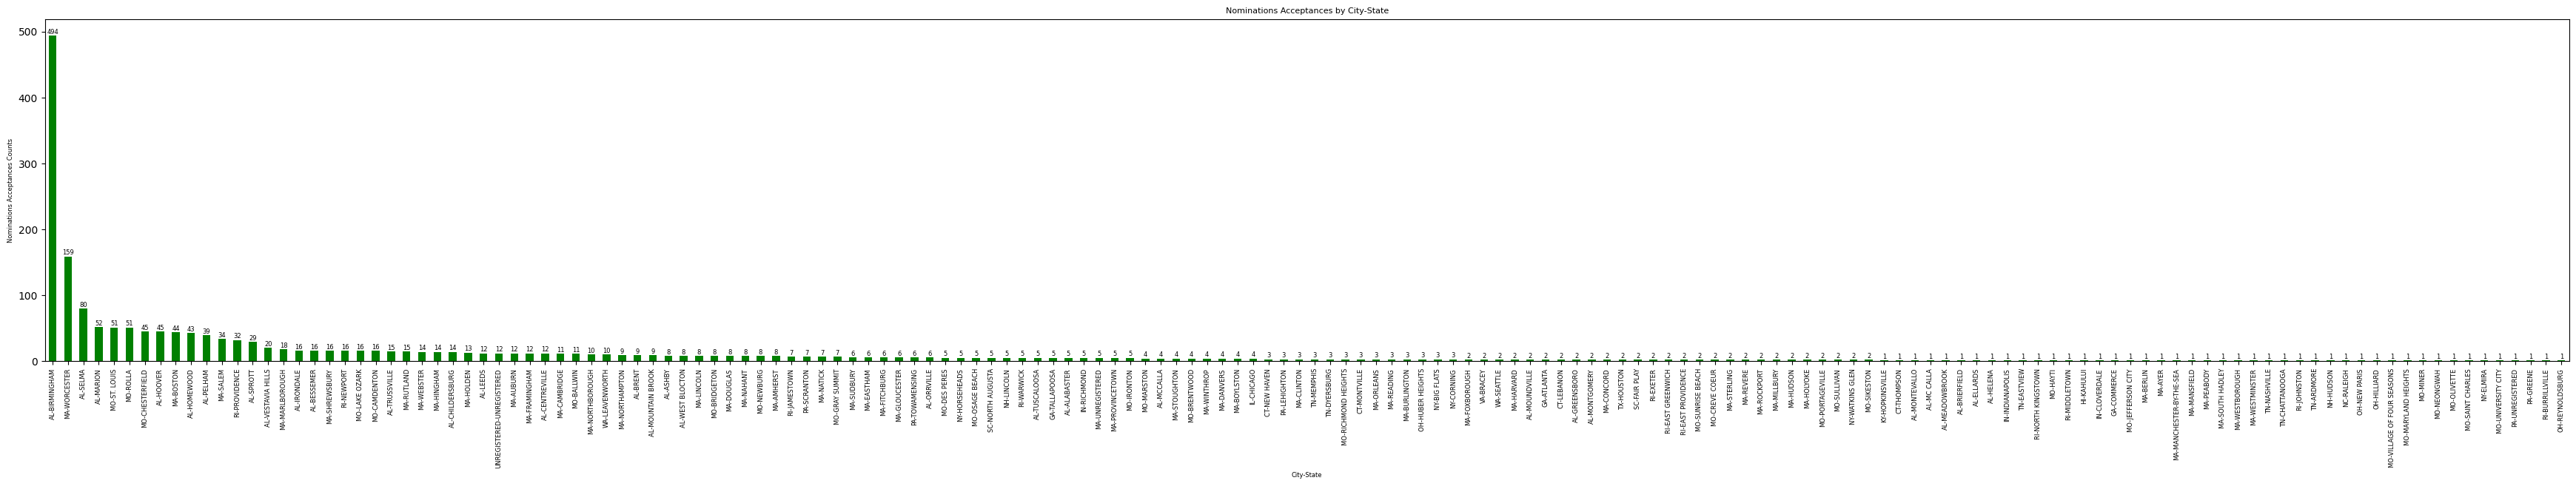

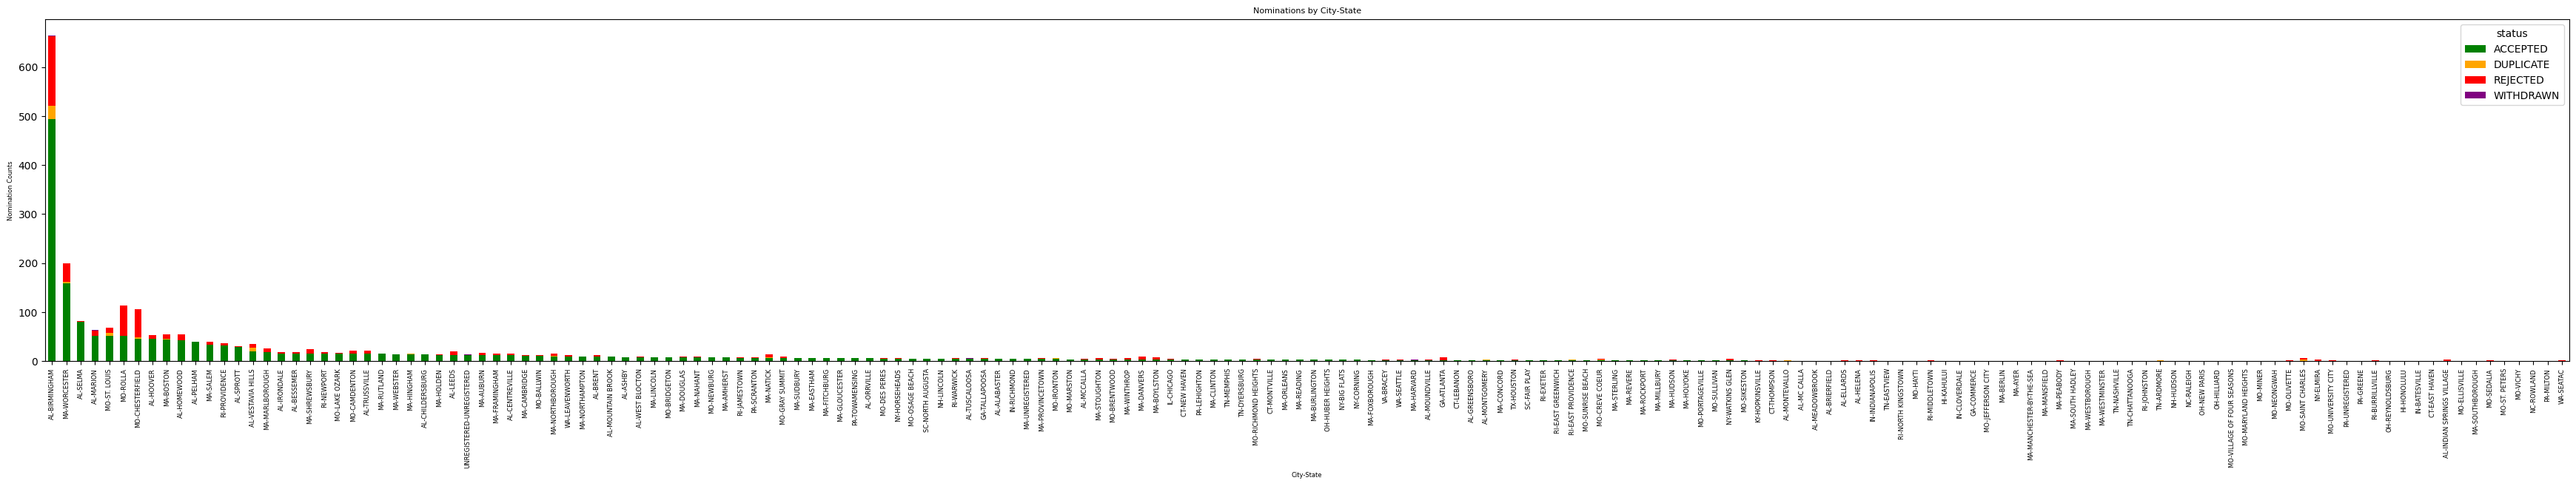

In [8]:
#Plot #2 - Nominations bar plot by state-city
#This will create two plots, a bar plot for approved waypoints, with a bar for each unique state-city combination, to highlight more specific areas
#one plot will only list approvals, and the other will be a stacked bar plot that also includes rejections

#create a new state_city column
df["state_city"] = df["state"] + "-" + df["city"]


state_city_status_counts = pd.crosstab(df["state_city"], df["status"])

#sort by accepted order
state_city_status_counts = state_city_status_counts.sort_values(by="ACCEPTED", ascending=False)

#output cross table to a csv
state_city_status_counts.to_csv(input_dir + "/" + file_prefix + "state_city_table.csv")

num_bars = len(state_city_status_counts)
fig_width = max(12, num_bars * 0.25)  # adjust width dynamically
fig_height = 6
font_size = min(10, max(6, 120 // num_bars))  # adjust font size dynamically

#approvals only:

fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Filter to rows with ACCEPTED > 0
accepted_counts = state_city_status_counts["ACCEPTED"]
accepted_counts = accepted_counts[accepted_counts > 0]

accepted_counts.plot(
    kind="bar",
    color="green",
    ax=ax
)

# Titles and labels
plt.title("Nominations Acceptances by City-State", fontsize=font_size+2)
plt.xlabel("City-State", fontsize=font_size)
plt.ylabel("Nominations Acceptances Counts", fontsize=font_size)
plt.xticks(rotation=90, fontsize=font_size)

#plot the counts per state bar
for i, v in enumerate(accepted_counts):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=font_size)

# Save to PNG
fig.savefig(input_dir + "/" + file_prefix + "state_city_accepted.png", dpi=150, bbox_inches="tight")

plt.show()

#all:

fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Plot stacked bars
state_city_status_counts[plot_order].plot(
    kind="bar",
    stacked=True,
    color=colors,
    ax=ax
)

# Titles and labels
plt.title("Nominations by City-State", fontsize=font_size+2)
plt.xlabel("City-State", fontsize=font_size)
plt.ylabel("Nomination Counts", fontsize=font_size)
plt.xticks(rotation=90, fontsize=font_size)


# Save to PNG
fig.savefig(input_dir + "/" + file_prefix + "state_city_all.png", dpi=150, bbox_inches="tight")

plt.show()

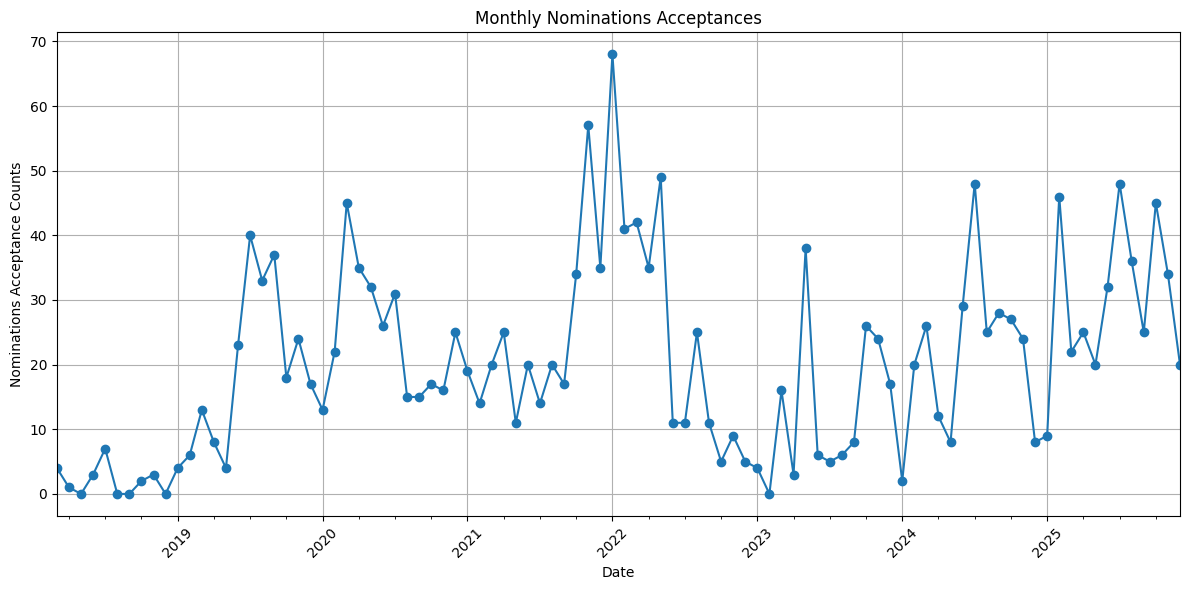

<Figure size 1200x600 with 0 Axes>

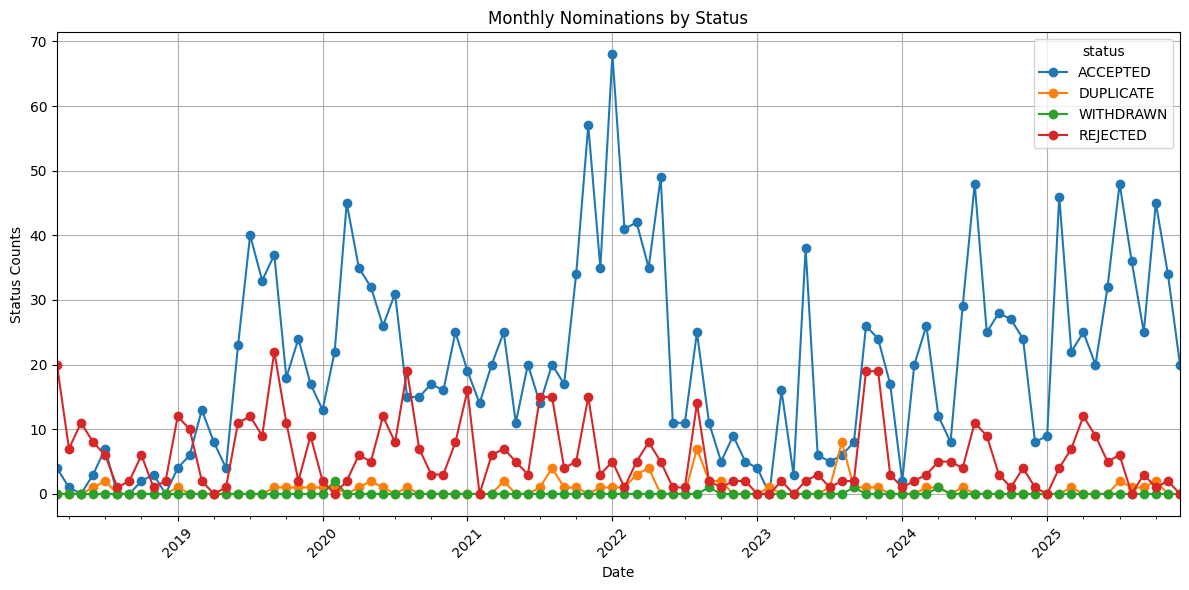

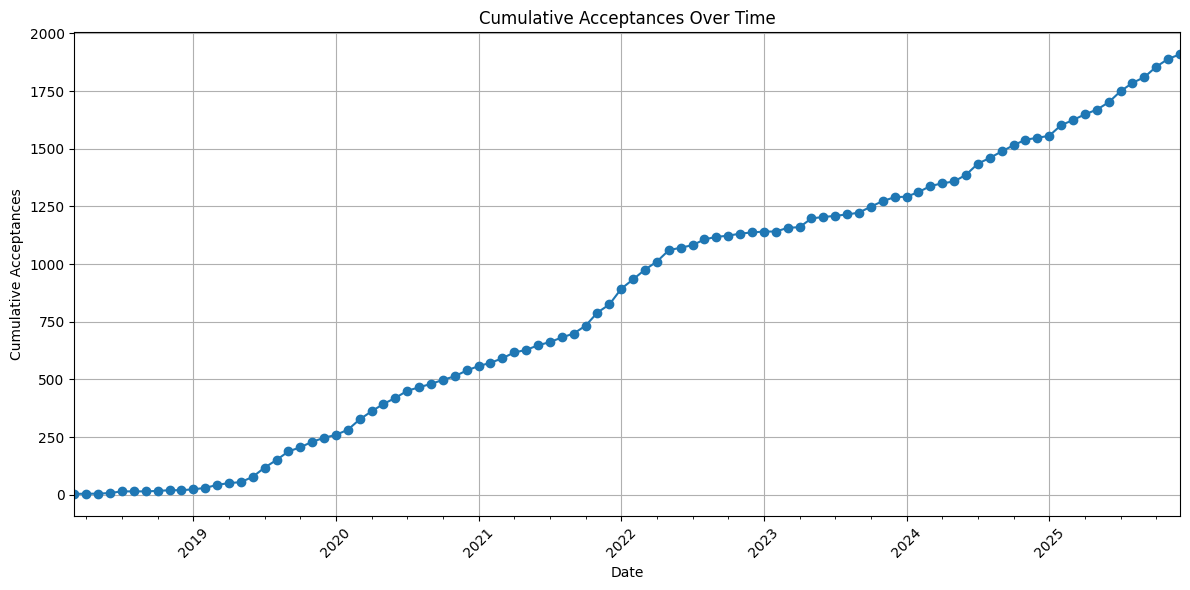

<Figure size 1200x600 with 0 Axes>

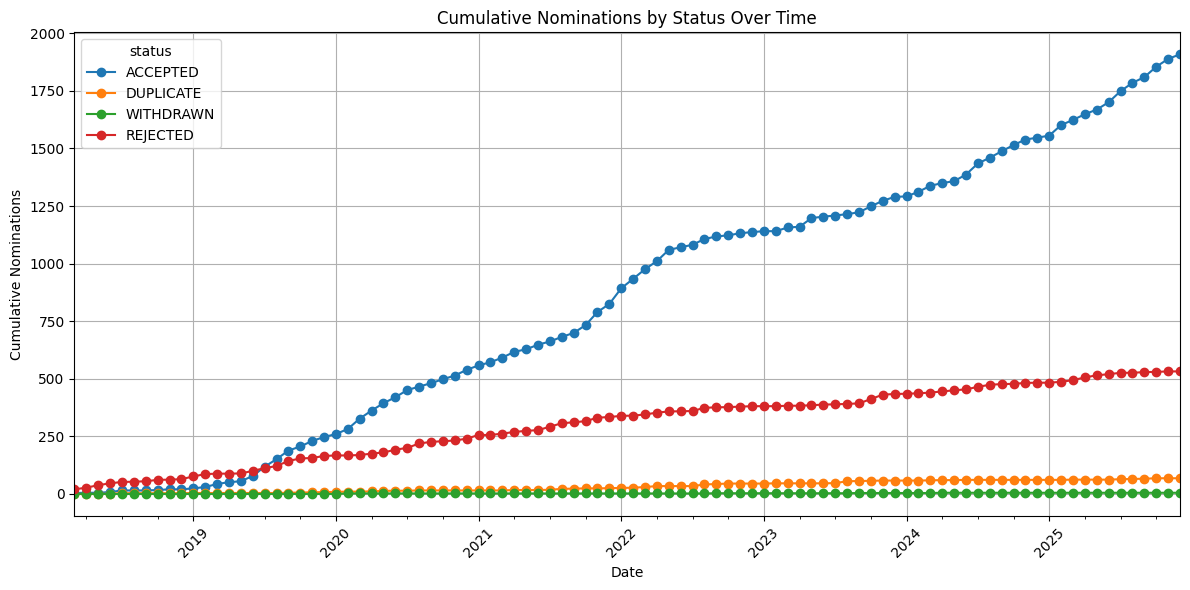

In [9]:
#Plot #3 - Nominations bar plot by state-city
#This will create four plots:
#1 - A timeline plot of just acceptances, month over month
#2 - A timeline plot of acceptances, rejections, duplicates, and withdrawls, month over month
#3 - A timeline plot of just acceptances, total over time
#4 - A timeline plot of acceptances, rejections, duplicates, and withdrawls, total over time

#standardize dates
df["day"] = pd.to_datetime(df["day"], format="%Y-%m-%d")

#month over month
monthly_status_counts = df.groupby([df["day"].dt.to_period("M"), "status"]).size().unstack(fill_value=0)
#Acceptances

plt.figure(figsize=(12, 6))
monthly_status_counts["ACCEPTED"].plot(kind="line", marker='o', figsize=(12, 6))
plt.title("Monthly Nominations Acceptances")
plt.xlabel("Date")
plt.ylabel("Nominations Acceptance Counts")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.savefig(input_dir + "/" + file_prefix + "timeline_monthly_acceptances.png", dpi=150, bbox_inches="tight")
plt.show()

#all

status_order = ["ACCEPTED", "DUPLICATE", "WITHDRAWN", "REJECTED"]
monthly_status_counts = monthly_status_counts[status_order]
plt.figure(figsize=(12, 6))
monthly_status_counts.plot(kind="line", marker='o', figsize=(12, 6))
plt.title("Monthly Nominations by Status")
plt.xlabel("Date")
plt.ylabel("Status Counts")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.savefig(input_dir + "/" + file_prefix + "timeline_monthly_all.png", dpi=150, bbox_inches="tight")

plt.show()

#aggregating total
monthly_status_counts = df.groupby([df["day"].dt.to_period("M"), "status"]).size().unstack(fill_value=0)

#accepted

status_order = ["ACCEPTED", "DUPLICATE", "WITHDRAWN", "REJECTED"]
monthly_status_counts = monthly_status_counts[status_order]

cumulative_status_counts = monthly_status_counts.cumsum()

plt.figure(figsize=(12,6))
cumulative_status_counts["ACCEPTED"].plot(marker='o', figsize=(12,6))

plt.title("Cumulative Acceptances Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Acceptances")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig(input_dir + "/" + file_prefix + "timeline_cumulative_acceptances.png", dpi=150, bbox_inches="tight")
plt.show()

#all

status_order = ["ACCEPTED", "DUPLICATE", "WITHDRAWN", "REJECTED"]
monthly_status_counts = monthly_status_counts[status_order]

cumulative_status_counts = monthly_status_counts.cumsum()

plt.figure(figsize=(12,6))
cumulative_status_counts.plot(marker='o', figsize=(12,6))

plt.title("Cumulative Nominations by Status Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Nominations")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig(input_dir + "/" + file_prefix + "timeline_cumulative_all.png", dpi=150, bbox_inches="tight")
plt.show()